In [1]:
from glob import glob
from os import path
from pandas import read_csv, concat
from csv import writer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline

W0828 17:59:59.975545 16756 __init__.py:690] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [2]:
#load data
folder_path = './csv/SwingData/'

#파일 형식: s1_gyr.csv
swing_files = glob(path.join(folder_path, 'Golf*.csv'))

df_swing = concat((read_csv(f,header=0) for f in swing_files),ignore_index=True)
df_swing.fillna(0, inplace=True)

#load data
folder_path = './csv/PertingData/'

#파일 형식: s1_gyr.csv
perting_files2 = glob(path.join(folder_path, 'Golf*.csv'))

df_perting = concat((read_csv(f,header=0) for f in perting_files2),ignore_index=True)
df_perting.fillna(0, inplace=True)


In [3]:
df_swing.head()

,Time,GyroX,GyroY,GyroZ,PosX,PosY,PosZ,TorPie,TorThe,Unnamed: 9
0,Started:,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.0
1,0.0,-0.098198,-0.090206,-0.039393,0.000000,0.000000,0.600000,0.0,0.0,0.0
2,0.0,-0.098198,-0.114030,-0.025954,0.000000,0.000000,0.600000,0,0,0.0
3,0.0,-0.098198,-0.063939,-0.044280,0.000000,0.000000,0.600000,0,0,0.0
4,0.0,-0.098198,-0.062106,-0.062606,0.000004,-0.001256,0.599999,1.1381523095658346,-546.1549344116501,0.0


In [4]:
df_swing = df_swing.iloc[:,:4]
df_swing.head()

,Time,GyroX,GyroY,GyroZ
0,Started:,0.000000,0.000000,0.000000
1,0.0,-0.098198,-0.090206,-0.039393
2,0.0,-0.098198,-0.114030,-0.025954
3,0.0,-0.098198,-0.063939,-0.044280
4,0.0,-0.098198,-0.062106,-0.062606


In [5]:
df_perting = df_perting.iloc[:,:4]
df_perting.head()

,Time,GyroX,GyroY,GyroZ
0,Started:,0.000000,0.000000,0.000000
1,0.0,0.301259,-0.103254,-0.268839
2,0.0,-0.106799,-0.103254,-0.162549
3,0.0,-0.474540,0.382384,-0.103906
4,0.0,-0.407344,0.508833,-0.182707


In [6]:
import basicfunc2

In [7]:
df_swing.columns

Index(['Time', 'GyroX', 'GyroY', 'GyroZ'], dtype='object')

In [8]:
def plotgrp(df,title):
    start,end = 1,1
    
    columns = df.columns
    for i in range(1,len(df)):
      
    
        if df['Time'][i] == 'Started:':
            end = i-1
            subset = df[start:end][1:].astype(float)
            x_len = len(subset)
            plt.plot([x for x in range(x_len)],subset[columns[1]],color='r')
            plt.plot([x for x in range(x_len)],subset[columns[2]],color = 'g')
            plt.plot([x for x in range(x_len)],subset[columns[3]],color='b')
            start = i+1 
        
        plt.legend(['X','Y','Z'])
        plt.title(title)


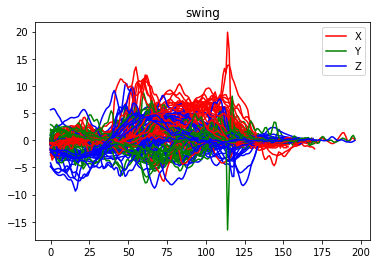

In [9]:
plotgrp(df_swing,"swing")

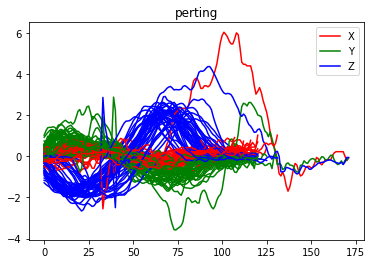

In [10]:
plotgrp(df_perting,"perting")

In [11]:
seqlen = 150

In [12]:
X = np.empty(shape=(1,seqlen,3))
y = []
#swing은 1 perting은 0
start = 1
end = 0

for i in range(1,len(df_swing)):
    if i==len(df_swing)-1:
        end = i-1

        subset= df_swing.iloc[start:end,1:].astype(float)
        subset= basicfunc2.resizedataseq(subset,seqlen)
        start = i+1
        if len(subset) == seqlen:
            subset = subset.values
            subset=subset[np.newaxis]
            X =np.concatenate((X,subset))
            y.append(1)

            
    if df_swing['Time'][i] == 'Started:':
        end = i-1
        subset= df_swing.iloc[start:end,1:].astype(float)
        subset= basicfunc2.resizedataseq(subset,seqlen)
        start = i+1
        if len(subset) == seqlen:
            subset = subset.values
            subset=subset[np.newaxis]
            X =np.concatenate((X,subset))
            y.append(1)
        
        
print(X.shape)

(44, 150, 3)


In [13]:
X=np.delete(X,0,axis=0)

In [14]:
#swing은 1 perting은 0
start = 1
end = 0

for i in range(1,len(df_perting)):
    if i==len(df_perting)-1:
        end = i-1
        subset= df_perting.iloc[start:end,1:].astype(float)
        subset= basicfunc2.resizedataseq(subset,seqlen)
        start = i+1
        if len(subset) == seqlen:
            subset = subset.values
            subset=subset[np.newaxis]
            X =np.concatenate((X,subset))
            y.append(0)

            
    if df_perting['Time'][i] == 'Started:':
        end = i-1
        subset= df_perting.iloc[start:end,1:].astype(float)
        subset= basicfunc2.resizedataseq(subset,seqlen)
        start = i+1
        
        if len(subset) == seqlen:
            subset = subset.values
            subset=subset[np.newaxis]
            X =np.concatenate((X,subset))
            y.append(0)
        
        
print(X.shape)

(83, 150, 3)


###  onehot encoding

In [15]:
y = np.asanyarray(pd.get_dummies(y),dtype = np.float32)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    shuffle=True,
                                                    random_state=1)

In [17]:
N_CLASSES = 2
N_HIDDEN_UNITS = 64

In [18]:
N_TIME_STEPS = seqlen
N_FEATURES = 3

In [19]:
def create_LSTM_model(inputs):
    W = {
        'hidden': tf.Variable(tf.random_normal([N_FEATURES, N_HIDDEN_UNITS])),
        'output': tf.Variable(tf.random_normal([N_HIDDEN_UNITS, N_CLASSES]))
    }
    biases = {
        'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean=1.0)),
        'output': tf.Variable(tf.random_normal([N_CLASSES]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, N_FEATURES])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, N_TIME_STEPS, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.contrib.rnn.BasicLSTMCell(N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(2)]
    lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers)

    outputs, _ = tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']

In [20]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, N_TIME_STEPS, N_FEATURES], name="input")
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

In [21]:
pred_Y = create_LSTM_model(X)

pred_sigmoid = tf.nn.sigmoid(pred_Y, name="y_")

W0828 18:00:36.162759 16756 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0828 18:00:37.581972 16756 deprecation.py:323] From <ipython-input-19-c8ae7df74e6e>:17: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W0828 18:00:37.583959 16756 deprecation.py:323] From <ipython-input-19-c8ae7df74e6e>:18: MultiRNNCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is

In [22]:
L2_LOSS = 0.0015

l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

W0828 18:00:42.208592 16756 deprecation.py:323] From C:\Users\Bin\Anaconda3\envs\venv_ml\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
LEARNING_RATE = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_sigmoid, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [24]:
N_EPOCHS = 30
BATCH_SIZE = 64

In [27]:
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_train)

for i in range(1, N_EPOCHS + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),
                          range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_train,
                                       Y: y_train})
        
    _, acc_train, loss_train = sess.run([pred_sigmoid, accuracy, loss], feed_dict={
                                            X: X_train, Y: y_train})

    _, acc_test, loss_test = sess.run([pred_sigmoid, accuracy, loss], feed_dict={
                                            X: X_test, Y: y_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    if i != 1 and i % 10 != 0:
        continue

    print(f'epoch: {i} test accuracy: {acc_test} loss: {loss_test}')
    
predictions, acc_final, loss_final = sess.run([pred_sigmoid, accuracy, loss], feed_dict={X: X_test, Y: y_test})

print()
print(f'final results: accuracy: {acc_final} loss: {loss_final}')

epoch: 1 test accuracy: 0.7647058963775635 loss: 1.1325998306274414
epoch: 10 test accuracy: 1.0 loss: 0.6056544780731201
epoch: 20 test accuracy: 1.0 loss: 0.5813698172569275
epoch: 30 test accuracy: 1.0 loss: 0.5681663751602173

final results: accuracy: 1.0 loss: 0.5681663751602173


In [28]:
pickle.dump(predictions, open("our_predictions.p", "wb"))
pickle.dump(history, open("our_history.p", "wb"))
tf.train.write_graph(sess.graph_def, '.', './checkpoint/our_har.pbtxt')  
saver.save(sess, save_path = "./checkpoint/our_har.ckpt")
sess.close()


In [29]:
history = pickle.load(open("our_history.p", "rb"))
predictions = pickle.load(open("our_predictions.p", "rb"))

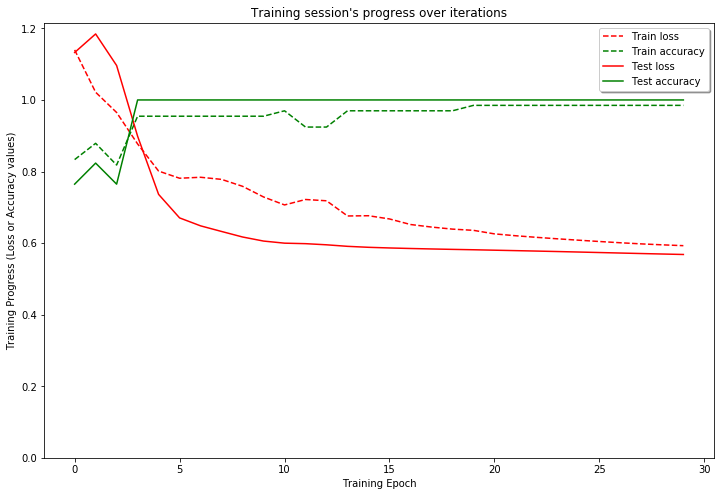

In [30]:
plt.figure(figsize=(12, 8))

plt.plot(np.array(history['train_loss']), "r--", label="Train loss")
plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")

plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
plt.plot(np.array(history['test_acc']), "g-", label="Test accuracy")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)

plt.show()

In [31]:

LABELS = ['perting','swing']

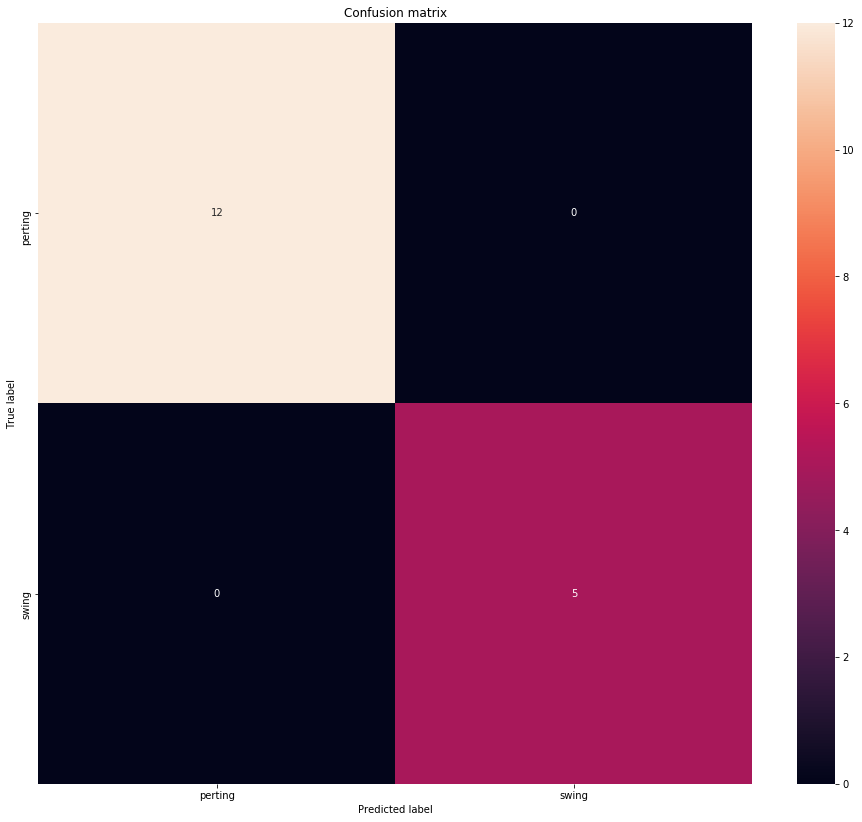

In [32]:
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

plt.figure(figsize=(16, 14))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

In [33]:
from tensorflow.python.tools import freeze_graph

MODEL_NAME = 'our_har'

input_graph_path = 'checkpoint/' + MODEL_NAME+'.pbtxt'
checkpoint_path = './checkpoint/' +MODEL_NAME+'.ckpt'
restore_op_name = "save/restore_all"
filename_tensor_name = "save/Const:0"
output_frozen_graph_name = 'frozen_'+MODEL_NAME+'.pb'

freeze_graph.freeze_graph(input_graph_path, input_saver="",
                          input_binary=False, input_checkpoint=checkpoint_path, 
                          output_node_names="y_", restore_op_name="save/restore_all",
                          filename_tensor_name="save/Const:0", 
                          output_graph=output_frozen_graph_name, clear_devices=True, initializer_nodes="")

W0828 18:02:47.540387 16756 deprecation.py:323] From C:\Users\Bin\Anaconda3\envs\venv_ml\lib\site-packages\tensorflow_core\python\tools\freeze_graph.py:127: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
W0828 18:02:59.172286 16756 deprecation.py:323] From C:\Users\Bin\Anaconda3\envs\venv_ml\lib\site-packages\tensorflow_core\python\tools\freeze_graph.py:233: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
W0828 18:02:59.173312 16756 deprecation.py:323] From C:\Users\Bin\Anaconda3\envs\venv_ml\lib\site-packages\tensorflow_core\python\framework\graph_util_impl.py:277: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecate

node {
  name: "input"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: -1
        }
        dim {
          size: 150
        }
        dim {
          size: 3
        }
      }
    }
  }
}
node {
  name: "Variable"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 3
          }
          dim {
            size: 64
          }
        }
        tensor_content: "zf\370\277\021\005\233\277\311\345\222<\346\317\201?\272a\021@\331\217C\277\305\376\035?\245\276\n\300\353\242\345>\315\222L>\334\276{>\335\274\231\276\014\255\323\276\213l9\277UY\021\277-\262\243?\324\366\335?\rJ\221>T\377\214?;r\354\277\243J\247\277\025\037\330?\373\322\316\275`\325\330\2762\327\221\276\362X\331\276\027-\316\277\253\215\216??